# Predicting heart disease using machine learning 

this notebook looks to using python machine learning libraries to predict wheter or not they have 
heart diseases based off their medical attributes.
Following approach :
1. problem definition
2. data
3. evaluation
4. Features 
5. Moddeling
6. Experimentation
## 1. Problem definition
in a statemnt,
> Given clinical parameters about a patient, can we predict wether or not the have it?
## 2.Data
The original data came from cleavelan from UCI respo https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
## 3. Evaluation
> if we can reach 95% accuracy at predicting wheter or not a patien heart d during the proof of concept. we'll pursue the project.
## 4. Features 
 **create data dictionary**
* Column Descriptions:
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type 
    0. typical angina :related decrease blood supply to heart
    1. atypical angina: chest pain not related to heart
    2. non-anginal : typical esophageal spasm(not heart related)
    3. asymptomatic: chest pain not showing sign of diseseic
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribu

## preparing the tools 
pandas, matplot and numpy to analysis and manipulation.

In [1]:
# import all the tools 
# Regular EDA(explarotory data analysiss) and plotting libraries

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
# import model from sk
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve
# import misc 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


## Load data

In [2]:
df=pd.read_csv("./data/heart-disease.csv")
df.shape

(303, 14)

## Data exploration (EDA)
the goal is to understand more about the data 
and become a subject matter export on  the dataset you're working with 
1. what question are you trying to solve?
2. what kind of data do we have and how we treat different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. How an you add, change or remove features to get more out of your data?


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# find out howmany each class are there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot: >

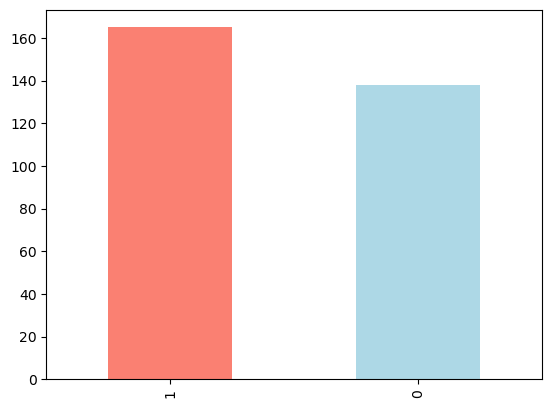

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# are there any missing value
df.isna().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart Disease Frequency according to Sex

In [10]:
# m=1,f=0
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target with sex collumn
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


#### First point
* women: `75 percent` chance she have heart disease 
* men: `50 percent` chance he have heart disease
* **anyone: `62.5 percent` chance they have heart disease**

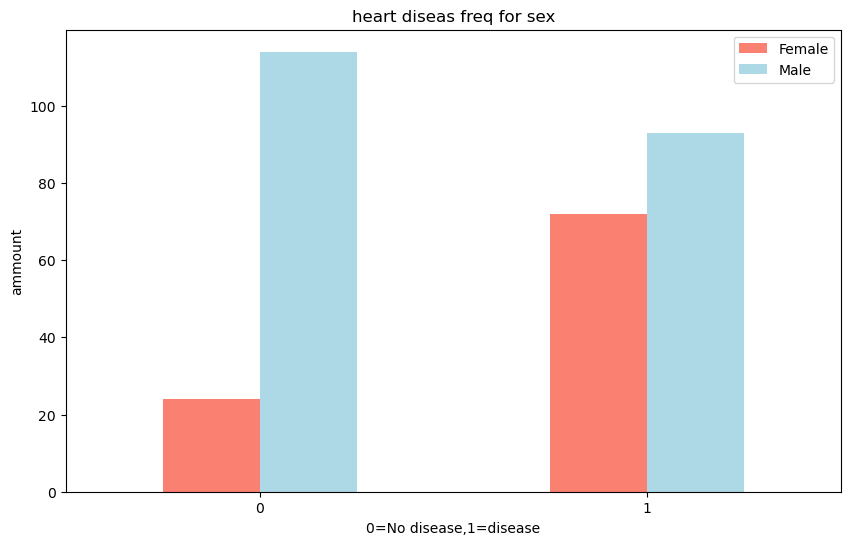

In [12]:
#  create aplot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"]
                                   
                                   
)
plt.title("heart diseas freq for sex")
plt.xlabel("0=No disease,1=disease")
plt.ylabel("ammount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [13]:
# thlaac maximum heart rate achieved with alot of value counts use scatter.
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

## Age vs max heart rate for Heart disease

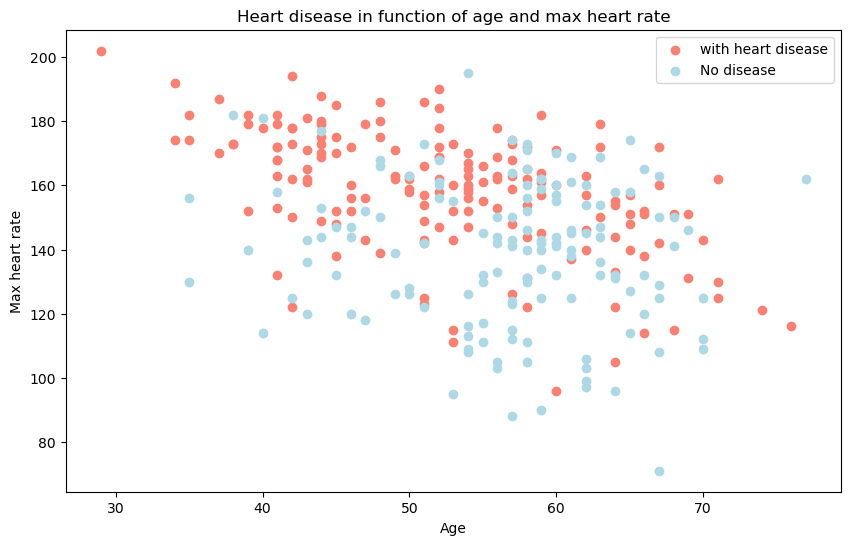

In [14]:
plt.figure(figsize=(10,6))
# Scatter with positive examples
# subset of subset df.age[df.target==1]
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon"
           )
# scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue"
           )
# Add some helpful info
plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["with heart disease","No disease"])


<AxesSubplot: ylabel='Frequency'>

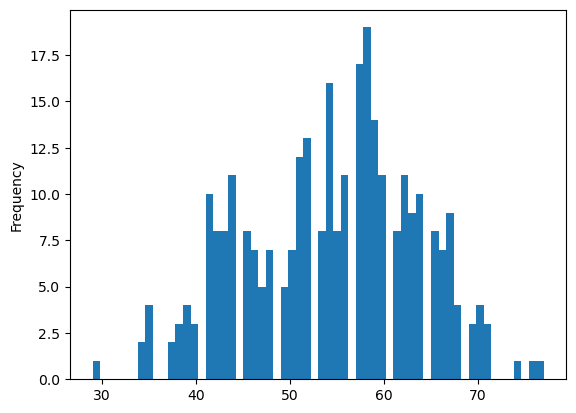

In [15]:
# Check the distribution of the age collumn with histogram
df.age.plot.hist(bins=60)
# normal distribution.

## Heart disiase frequency per chest pain type 
    0. typical angina :related decrease blood supply to heart
    1. atypical angina: chest pain not related to heart
    2. non-anginal : typical esophageal spasm(not heart related)
    3. asymptomatic: chest pain not showing sign of disese

In [16]:
# chest pain
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [17]:
# non heart related pain yet people got more heart disease ? now why is that
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


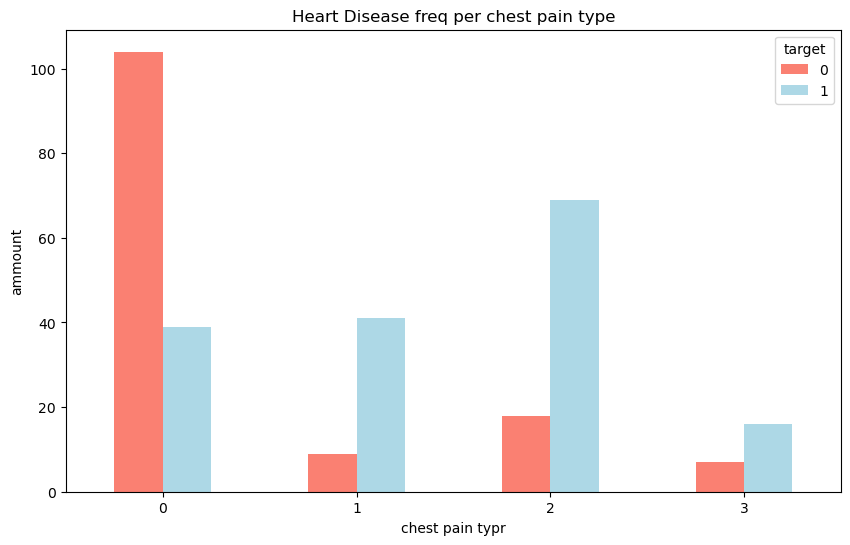

In [18]:
# Make the crosstab more visual 
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=(["salmon","lightblue"]))
plt.title("Heart Disease freq per chest pain type")
plt.xlabel("chest pain typr")
plt.ylabel("ammount")
plt.xticks(rotation=0);

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

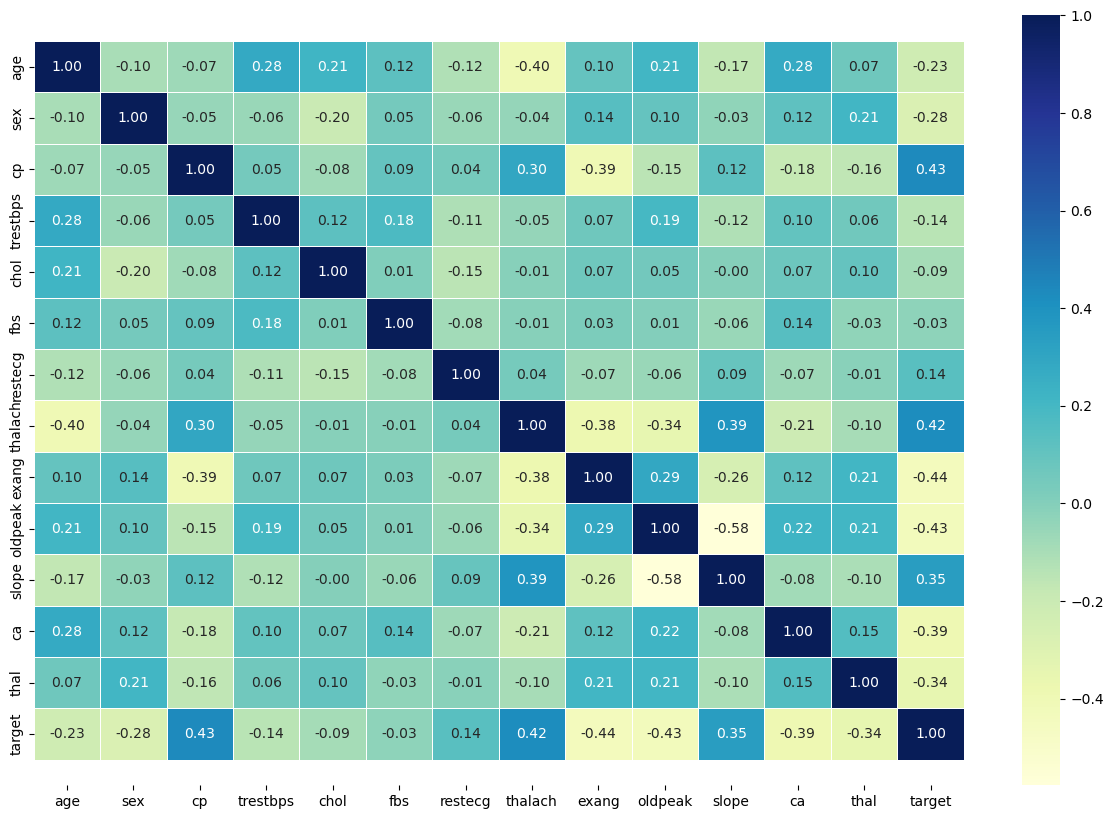

In [21]:
# lets make our correlation matrix a little pretier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu")
bottom, top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
# chest pain related to the target collumn
# higher positive value mean pottential positive related value
# vice versa
# cp is goes up, target value is also increases.


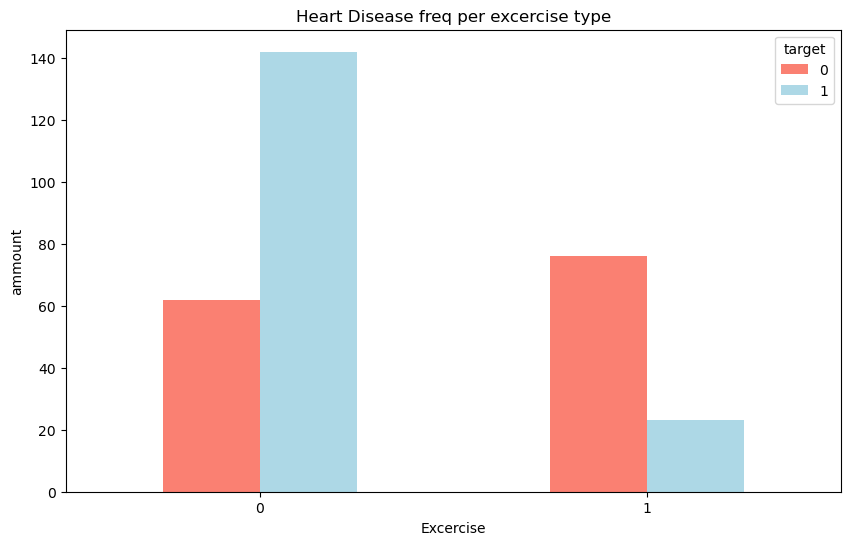

In [22]:
# Make the crosstab more visual 
# if you got excercise pain the it has no heart diseases
pd.crosstab(df.exang,df.target).plot(kind="bar",figsize=(10,6),color=(["salmon","lightblue"]))
plt.title("Heart Disease freq per excercise type")
plt.xlabel("Excercise")
plt.ylabel("ammount")
plt.xticks(rotation=0);

## 5. Modeling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Split data into x and y
x=df.drop("target",axis=1)
y=df["target"]


In [25]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
# split data into train and test sets
np.random.seed(42)
# split into train test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, its time to build a [machine learning model](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

we'll train it (find patterns) on training set.

and we'll test it (Use the patterns) on the test sets.

We'll use 3 ML models 
1. `LogisticRegression`
2. `KNearestneighbourClassifier`
3. `RandomForestClassifier`


In [29]:
# Put models in a dictionary
models={"Logistic regression": LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest Classifier":RandomForestClassifier()}
# create a function to fit and score model
def fit_and_score (model,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning model 
    models: dictionary of sklearn models
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train:training labels
    y_test: test labels
    """
    #random seed
    np.random.seed(42)
    # make dictionary
    model_score={}
    for name,model in model.items(): #for keys in dictionary
        #fit the model to the data
        model.fit(x_train,y_train)
        #evaljuate the model oand append the score to model_scores
        model_score[name]=model.score(x_test,y_test)
    return model_score

In [30]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)

C:\Users\Sains\TA\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
model_scores

{'Logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

In [32]:
### Model comparison

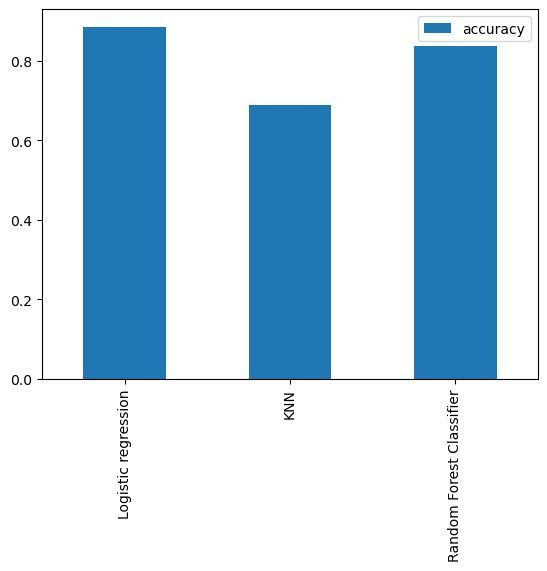

In [33]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

<AxesSubplot: >

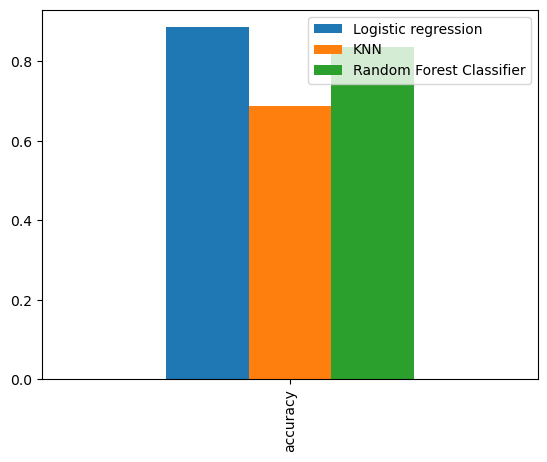

In [34]:
model_compare.plot.bar()

now we've got a baseline model... and we know a model first prediction aren't always what we should based our next steps off. what should we do?

lets look at the following: 
* hyperparameter tuning
* feature importance
* Confusion matrix 
* Cross validation 
* precision
* recall
* f1 score
* cassification report 
* ROc Curve
* Area Under the curve (AUC)
### Hyperparameter Tuning by hand



In [35]:
train_scores=[]
test_scores=[]

# Create a list of different values for n_neighbours
neighbors=range(1,21)
# setup Knn instace
knn=KNeighborsClassifier()
# loop through n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
#     fit the algorithm
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
    


In [36]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [37]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum knn score on the test data:75.41%


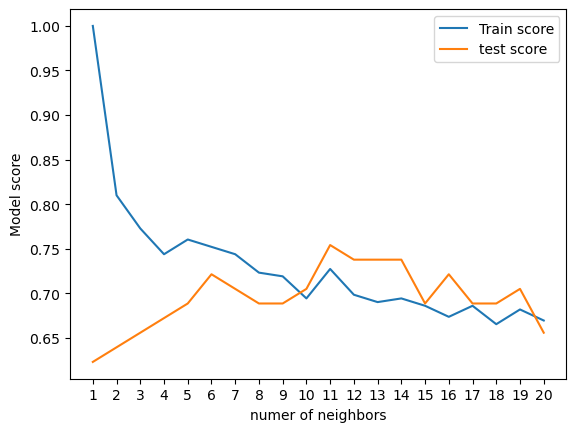

In [38]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="test score")
plt.xlabel("numer of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.xticks(np.arange(1,21,1))
print(f"maximum knn score on the test data:{max(test_scores)*100:.2f}%")

## Hyper parameter tuning with RandomizedSearchCV
We're going tu tune:
* LogisticRegression()
* RandomForestClassifier()

In [39]:
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.pipeline import Pipeline
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver": ["liblinear"]
             }
# create hyperparameter grid for RandomForestClassifer is highliy recomende to use 
# continuous distribution or Parameter 
rf_grid={"n_estimators": np.arange(10,100,50),
        "max_depth": [None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

Tuning using RandomizedSearchCV

In [40]:
# tune Logistic regression
np.random.seed(42)
# setup random hyperparameter search for logisticregression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True
)
# Fit random hyper parameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [41]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [42]:
np.random.seed(42)
# setup random hyperparameter search for logisticregression
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True
)
# Fit random hyper parameter search model for LogisticRegression
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [43]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [44]:
# evaluate Randomizesearch RandomForestClassifeier  model
rs_rf.score(x_test,y_test)

0.819672131147541

1. byhand
2. RandomizedSearchCV
3. GridSearch cv


In [45]:
# Different hyperparamteres for Lg model
from sklearn.model_selection import GridSearchCV
log_reg_grid1={"C":np.logspace(-4,4,30),
             "solver": ["liblinear"],
    }
# setup grid hyper parameter search for LogisticRegression
gs_log_reg=GridSearchCV(
LogisticRegression(),
param_grid=log_reg_grid,
cv=5,
verbose=True
)


In [46]:
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [47]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [48]:
model_scores

{'Logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

In [49]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [50]:
# gridsearch cv for Randomized forest
rs_grid_1={"n_estimators": np.arange(5,100,50),
        "max_depth": [None,1,5,100],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}
# Setup gridsearchcv for Randomized forest
gs_rs=GridSearchCV(RandomForestClassifier(),
                param_grid=rs_grid_1,
                cv=5,
                verbose=True
)

In [51]:
gs_rs.fit(x_train,y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 5, 100],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([ 5, 55])},
             verbose=True)

In [52]:
gs_rs.score(x_train,y_train)

0.8677685950413223

In [53]:
gs_rs.best_params_

{'max_depth': None,
 'min_samples_leaf': 13,
 'min_samples_split': 14,
 'n_estimators': 55}

In [54]:
# congusion matrix
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    plot_conf_mat(y_test, y_preds)

## Evaluating our tuned machine learning Classifier, beyond accuracy
* Roc AUC
* ConfusionMatrix
* ClassificationReport
* Precision
* Recall
* F1score

... and it would be great if cross-validation was used where possible.

Makeprediction

In [55]:
# make prediction with tuned model
y_preds=gs_log_reg.predict(x_test)

In [56]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [57]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [58]:
from sklearn.model_selection import cross_val_score 

C:\Users\Sains\TA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


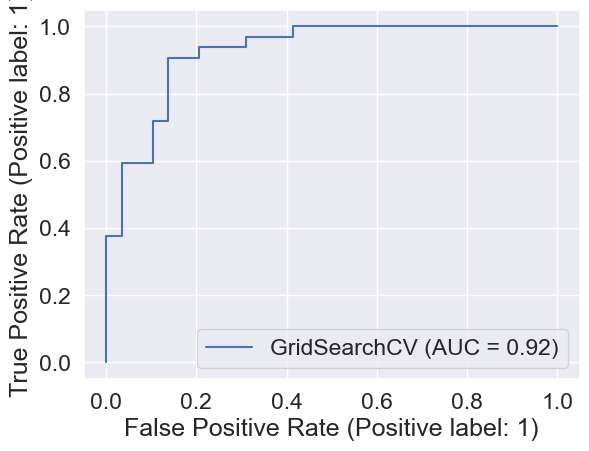

In [59]:
# plor roc curve and calculate AUC metric
plot_roc_curve(gs_log_reg,x_test,y_test);

In [60]:
print(confusion_matrix(y_test,y_preds))


[[25  4]
 [ 3 29]]


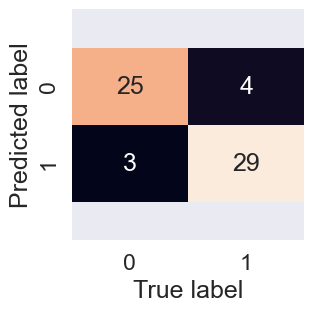

In [61]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots Confusion matrix using seaborn's HeatMap()
    
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)
plot_conf_mat(y_test,y_preds)

we got a ROC curve , AUC. and confusion matrix, lest get classification report crossbalidation precission recall and f1 score

In [62]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate eveluation metrics using Cross val score
we're going to calculate precision,recall and f1-score using cross val score and to do so using `cross_val_score()`

In [63]:
from sklearn.model_selection import cross_val_score
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [64]:
# create a classifier with best parameter 
clf=LogisticRegression(C= 0.23357214690901212, solver="liblinear")


In [65]:
# cross-validated accuracy 
cv_acc=cross_val_score(clf,
                       x,
                       y,
                      cv=5,
                      scoring="accuracy")
cv_acc=np.mean(cv_acc)


In [66]:
# cross validation Precision
cv_precision=cross_val_score(clf,
                             x,
                             y,
                             cv=5,
                             scoring="precision"

)
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [67]:
# cross validated recall
# cross validation Precision
cv_recall=cross_val_score(clf,
                             x,
                             y,
                             cv=5,
                             scoring="recall"

)
cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [68]:
# cross validated F1-score
# cross validated recall
# cross validation Precision
cv_f1=cross_val_score(clf,
                             x,
                             y,
                             cv=5,
                             scoring="f1"

)
cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

In [69]:
# visualize cross validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_precision,
                         "Recall":cv_recall,
                         "F1":cv_f1},index=[0])




<AxesSubplot: title={'center': 'Cross-validated classification metrics'}>

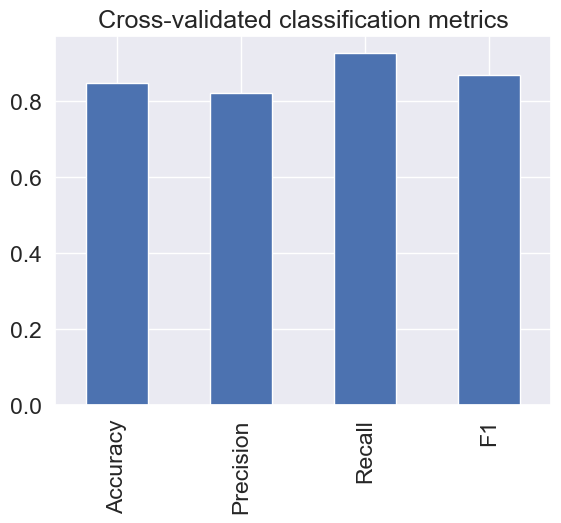

In [70]:
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False)


### feature importance 
Feature importance is another way of asking, "which features contriburted most ro the outcomes of the model and how did they contribute?" 

search for(Model name) feature importance

lets find the feature importance for our LogisticRegression model...


In [71]:
# fit an instance of logistiongregresison
gs_log_reg.best_params_
# create a classifier with best parameter 
clf=LogisticRegression(C= 0.23357214690901212, solver="liblinear")
clf.fit(x_train,y_train);
# check coef_ (logistic regression)


In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
clf.coef_

array([[ 0.00369922, -0.90424089,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490194,  0.02472938, -0.63120405, -0.57590939,
         0.47095134, -0.65165349, -0.69984206]])

In [74]:
# match coefs of features to collumns 
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003699220218693,
 'sex': -0.9042408909021112,
 'cp': 0.6747282639169492,
 'trestbps': -0.01161340193177967,
 'chol': -0.001703644306964925,
 'fbs': 0.047876883381437196,
 'restecg': 0.33490194499930287,
 'thalach': 0.024729383642503815,
 'exang': -0.6312040482089574,
 'oldpeak': -0.5759093926828687,
 'slope': 0.470951337854335,
 'ca': -0.651653485595126,
 'thal': -0.6998420593767237}

<AxesSubplot: title={'center': 'feature importance'}>

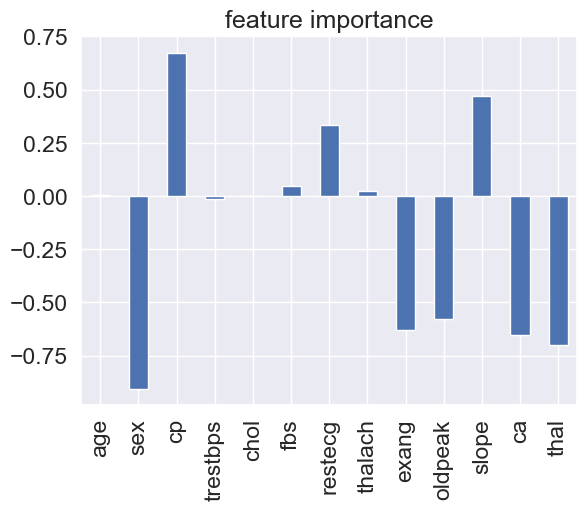

In [75]:
# model driven EDA

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="feature importance",legend=False)

In [76]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [77]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Slope- the sope of the peak excercise ST segment
* 0. UPsloping: better heart rate with excercise(uncommon)
* 1. Fatslopping: Minimal change(Typical health heart)
* 2. Downsloppins: signs of unhealthy heart 

## 6. Experimantation 
if you havent hit  evaluation metric yet.. ask your self...
* could you collect more data ?
* could you try a better model ? like CatBoost or XGBoost 
* coud you imporve the current models?(beyond what we've done so far)
* if you rmodel is good enough (hit your evaluation metric)
how would you export it and share it with others?